# Step 1: Add Gaussian Noise to Input Images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load and normalize
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Add Gaussian noise (mean=0, std=0.5)
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to keep them in [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Step 2: Define the Denoising Autoencoder Architecture

In [5]:
def build_denoising_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder


# Step 3: Compile and Train the Denoising Autoencoder

In [8]:
latent_dim = 32
denoising_autoencoder = build_denoising_autoencoder(latent_dim)
denoising_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train using noisy images as input, clean images as output
denoising_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3699 - val_loss: 0.2169
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2058 - val_loss: 0.1805
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1768 - val_loss: 0.1628
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1609 - val_loss: 0.1503
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1494 - val_loss: 0.1425
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1427 - val_loss: 0.1373
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1375 - val_loss: 0.1336
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1342 - val_loss: 0.1310
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1317 - val_loss: 0.1293
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1299 - val_loss: 0.1283
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1290 - val_loss: 0.1277
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

# Step 4: Visualize Noisy vs. Reconstructed Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


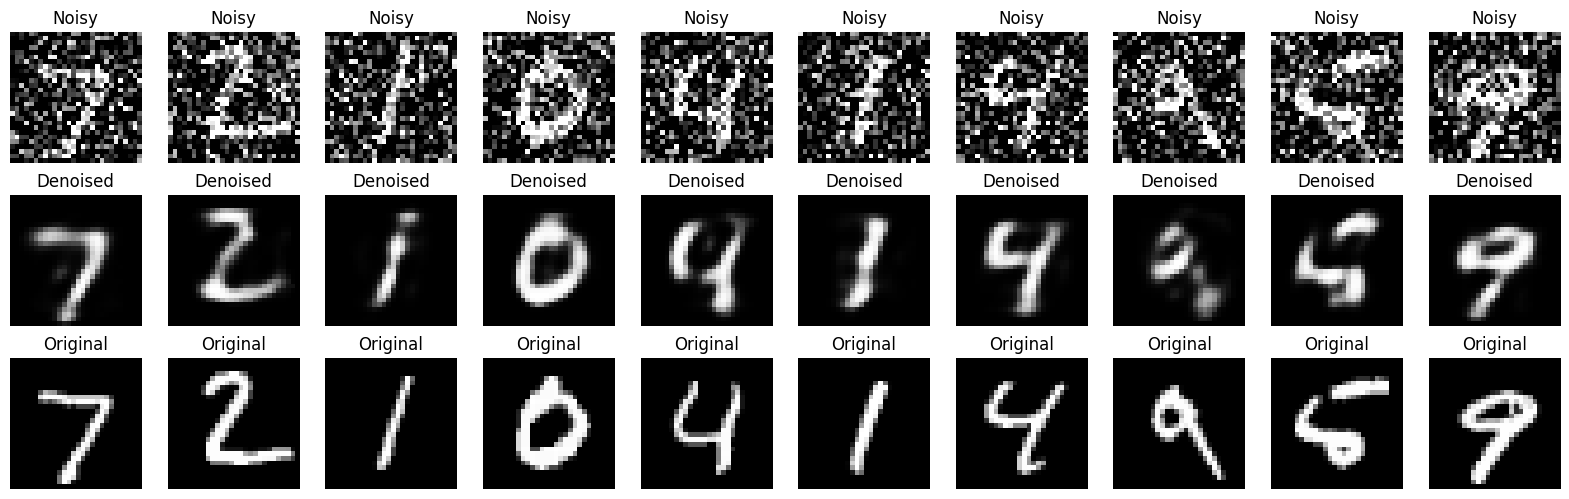

In [10]:
decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

# Compare noisy input and denoised output
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy Input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
    
    # Reconstructed (Denoised)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Ground Truth (Clean)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
plt.show()


# Step 5: Comparision with Basic Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


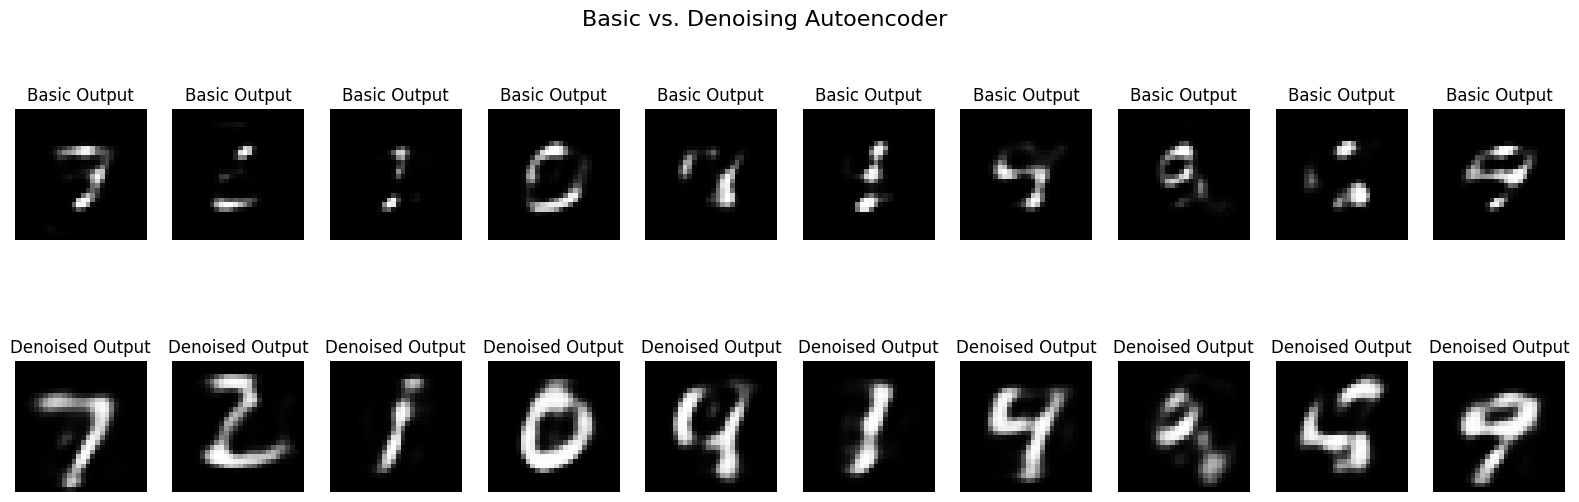

In [14]:
basic_autoencoder = build_denoising_autoencoder(latent_dim)
basic_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
basic_autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, verbose=0)

# Run basic autoencoder on noisy test images
decoded_basic = basic_autoencoder.predict(x_test_noisy)

# Visual comparison
plt.figure(figsize=(20, 6))
for i in range(n):
    # Basic autoencoder output
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_basic[i].reshape(28, 28), cmap="gray")
    plt.title("Basic Output")
    plt.axis("off")

    # Denoising autoencoder output
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised Output")
    plt.axis("off")
plt.suptitle("Basic vs. Denoising Autoencoder", fontsize=16)
plt.show()


# Step 6: Real-World Application of Denoising Autoencoders

🔍 Use Case: Medical Imaging
In MRI or CT scans, images are often noisy due to low radiation dosage or fast scanning. Denoising autoencoders can clean these images before further diagnosis, enhancing clarity without altering critical information—helping doctors make better decisions faster.